# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report,r2_score

In [7]:
f1 = r'C:\Users\alokk\Desktop\New folder\Churn_Modelling.csv' 
df=pd.read_csv(f1)

In [8]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.shape

(10000, 14)

In [12]:
is_Exited=df['Exited'].value_counts()

In [13]:
print("yes",is_Exited[1])
print("no",is_Exited[0])

yes 2037
no 7963


In [13]:
print(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [14]:
print(df.duplicated().sum())

0


In [15]:
df=df.drop(['RowNumber','Surname','CustomerId'],axis=1)
df['Balance']=df['Balance'].astype(int)
df['EstimatedSalary']=df['EstimatedSalary'].astype(int)

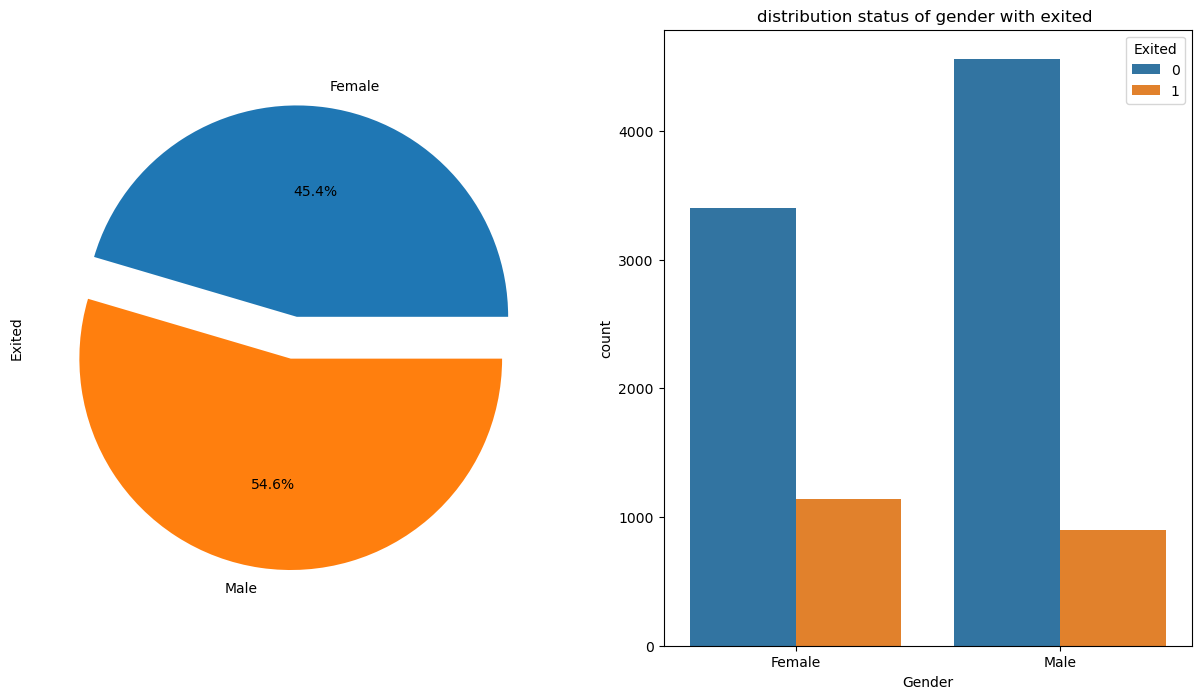

In [16]:
fig,axb=plt.subplots(ncols=2,nrows=1,figsize=(15,8))
explode=[0.1,0.1]
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode,autopct="%1.1f%%",ax=axb[0]);
ax=sns.countplot(x="Gender",hue="Exited",data=df,ax=axb[1])
plt.title("distribution status of gender with exited ")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

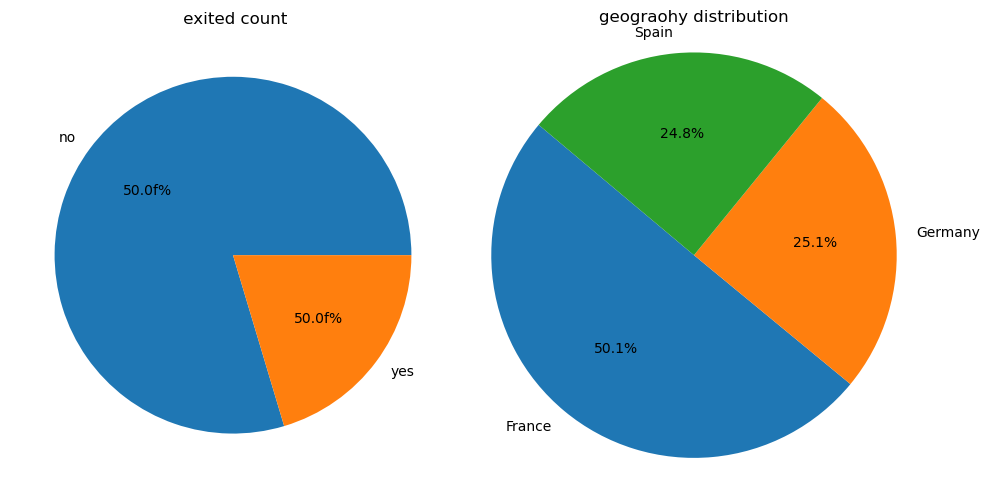

In [17]:
is_Exited=df["Exited"].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(is_Exited, labels=["no","yes"],autopct="50.0f%%")
plt.title(" exited count")

plt.subplot(1,2,2)
geography_counts=df["Geography"].value_counts()
plt.pie(geography_counts,labels=geography_counts.index,autopct='%1.1f%%',startangle=140)
plt.axis("equal")
plt.title("geograohy distribution")

plt.tight_layout()
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

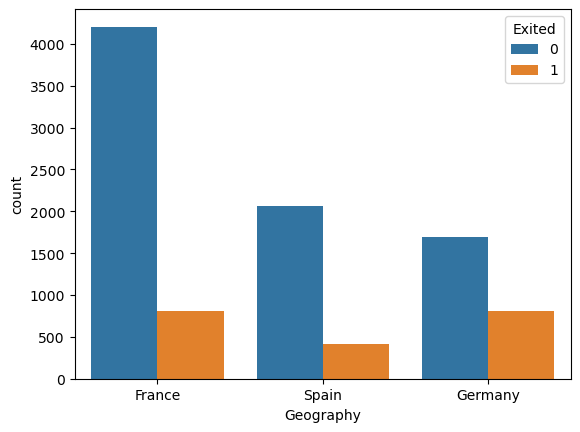

In [18]:
sns.countplot(x="Geography",hue='Exited',data=df)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,101348,1
1,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,502,France,Female,42,8,159660,3,1,0,113931,1
3,699,France,Female,39,1,0,2,0,0,93826,0
4,850,Spain,Female,43,2,125510,1,1,1,79084,0


In [21]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df["Gender"])
df["Geography"]=le.fit_transform(df["Geography"])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0
4,850,2,0,43,2,125510,1,1,1,79084,0


In [39]:
no_class=df[df["Exited"]==0]
yes_class=df[df["Exited"]==1]

no_class=resample(no_class,replace=False,n_samples=len(yes_class))
down_samples=pd.concat([yes_class,no_class],axis=0)
x=down_samples.drop("Exited",axis=1)
y=down_samples["Exited"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=65)
scaler=StandardScaler()


In [41]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
original_class=df["Exited"].value_counts()
downsampled_class=df["Exited"].value_counts()

In [43]:
original_percentage=original_class /len(df)*100
downsampled_percentage=downsampled_class/len(down_samples)*100

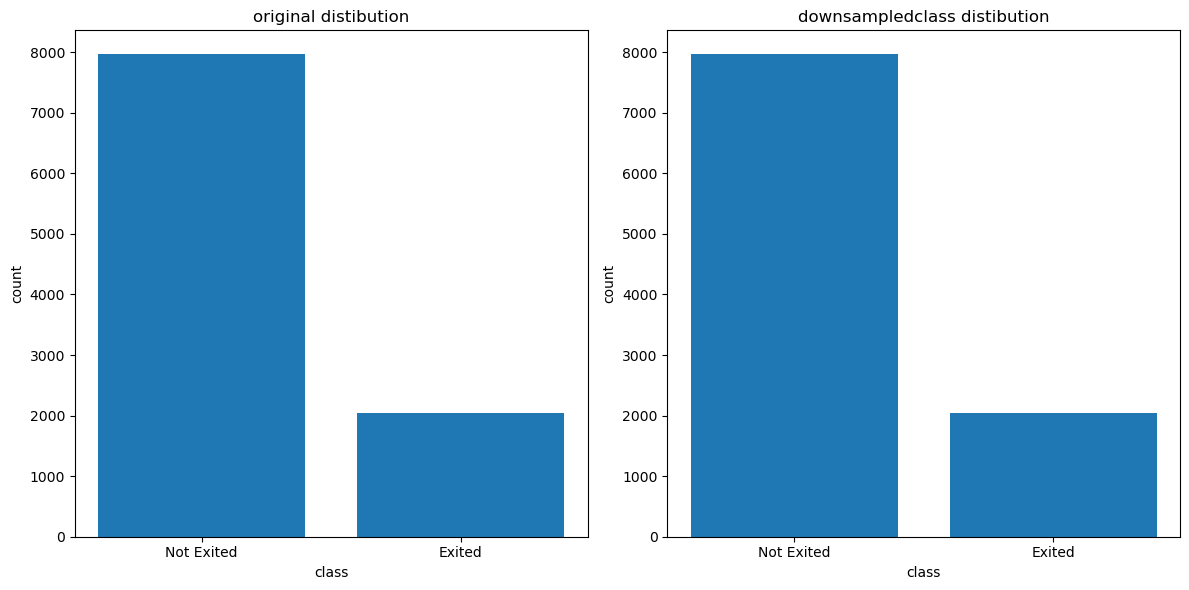

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

bar1=plt.bar(original_class.index,original_class.values)
plt.title("original distibution")
plt.xlabel("class")
plt.ylabel("count")
plt.xticks(original_class.index,["Not Exited","Exited"])

plt.subplot(1,2,2)
bar2=plt.bar(downsampled_class.index,downsampled_class.values)
plt.title("downsampledclass distibution")
plt.xlabel("class")
plt.ylabel("count")
plt.xticks(downsampled_class.index,["Not Exited","Exited"])
plt.tight_layout()
plt.show()

In [50]:
#random forest

In [52]:
RF=RandomForestClassifier(n_estimators=60,random_state=0)
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)
print(classification_report(y_test,pred_RF))
print("accuracy",accuracy_score(pred_RF,y_test))


              precision    recall  f1-score   support

           0       0.76      0.79      0.77       410
           1       0.77      0.75      0.76       405

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815

accuracy 0.7668711656441718


In [53]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
print(classification_report(y_test,pred_LR))
print("accuracy",accuracy_score(pred_LR,y_test))


              precision    recall  f1-score   support

           0       0.71      0.71      0.71       410
           1       0.70      0.70      0.70       405

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815

accuracy 0.7042944785276074
